In [71]:
import os
print(os.listdir('./PageIdentificationSamples/MsEdge'))

['94eb66f1cf5fc8abad69c33b6afdbc2e68ce4c33823efbe9c727d27089314472.pcap', '8e63dc9826b53c29c3a123762f4b7091cd6dfea06dd8897f7b3d7e3681524c41.pcap', '0194b0a3a8de8e593b7db54d7e2e0d62e775eefd69152c9b7ef1df3b3f6f7d3f.pcap']


In [72]:
from scapy.all import *

In [73]:
msedge_captures = []
msedge_captures.append(rdpcap('./PageIdentificationSamples/MsEdge/94eb66f1cf5fc8abad69c33b6afdbc2e68ce4c33823efbe9c727d27089314472.pcap'))
msedge_captures.append(rdpcap('./PageIdentificationSamples/MsEdge/8e63dc9826b53c29c3a123762f4b7091cd6dfea06dd8897f7b3d7e3681524c41.pcap'))
msedge_captures.append(rdpcap('./PageIdentificationSamples/MsEdge/0194b0a3a8de8e593b7db54d7e2e0d62e775eefd69152c9b7ef1df3b3f6f7d3f.pcap'))

torbrowser_captures = []
torbrowser_captures.append(rdpcap('./PageIdentificationSamples/TorBrowser/94eb66f1cf5fc8abad69c33b6afdbc2e68ce4c33823efbe9c727d27089314472.pcap'))
torbrowser_captures.append(rdpcap('./PageIdentificationSamples/TorBrowser/8e63dc9826b53c29c3a123762f4b7091cd6dfea06dd8897f7b3d7e3681524c41.pcap'))
torbrowser_captures.append(rdpcap('./PageIdentificationSamples/TorBrowser/0194b0a3a8de8e593b7db54d7e2e0d62e775eefd69152c9b7ef1df3b3f6f7d3f.pcap'))

firefox_captures = []
firefox_captures.append(rdpcap('./PageIdentificationSamples/Firefox/94eb66f1cf5fc8abad69c33b6afdbc2e68ce4c33823efbe9c727d27089314472.pcap'))
firefox_captures.append(rdpcap('./PageIdentificationSamples/Firefox/8e63dc9826b53c29c3a123762f4b7091cd6dfea06dd8897f7b3d7e3681524c41.pcap'))
firefox_captures.append(rdpcap('./PageIdentificationSamples/Firefox/0194b0a3a8de8e593b7db54d7e2e0d62e775eefd69152c9b7ef1df3b3f6f7d3f.pcap'))

In [74]:
def get_total_rx(pcapture, dest_ip):
    total_rx = 0
    for pkt in pcapture:
        if pkt.haslayer(IP):
            if pkt[IP].dst == dest_ip:
                total_rx += len(pkt)
    
    return total_rx

In [75]:
get_total_rx(msedge_captures[2], '192.168.2.15')

2004525

In [76]:
def get_total_rx_list(capture_list, dest_ip):
    total_rx_list = []
    for cap in capture_list:
        total_rx_list.append(get_total_rx(cap, dest_ip))
    
    return total_rx_list

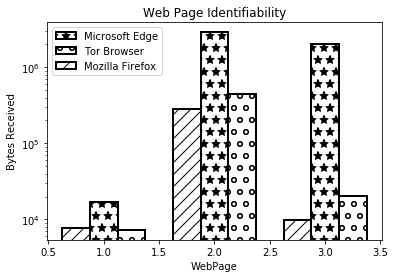

In [87]:
from matplotlib import pyplot as plt
import numpy as np
plt.bar(np.array([1,2,3]), get_total_rx_list(msedge_captures, '192.168.2.15'), edgecolor='black', color='w', linewidth=2, hatch='*', width=0.25, label='Microsoft Edge')
plt.bar(np.array([1,2,3])+0.25, get_total_rx_list(torbrowser_captures, '172.21.0.2'), edgecolor='black', color='w', linewidth=2, hatch='o', width=0.25, label='Tor Browser')
plt.bar(np.array([1,2,3])-0.25, get_total_rx_list(firefox_captures, '172.20.0.2'), edgecolor='black', color='w', linewidth=2, hatch='//', width=0.25, label='Mozilla Firefox')
plt.yscale('log')
plt.xlabel('WebPage')
plt.ylabel('Bytes Received')
plt.title('Web Page Identifiability')
plt.legend()
plt.show()